# ABOUT


Datascientest's Datascientist continuous bootcamp - cohorte Mars2022 -  AeroBOT project

**Tutor**

* Alban THUET

**Authors:**

* Hélène ASSIR
* Hichem HADJI  
* [Ioannis STASINOPOULOS](https://www.linkedin.com/in/ioannis-stasinopoulos/)

</br>

---
</br>

**Version History**

Version | Date       | Author(s)  | Modification
--------|----------- | ---------  | --------------------------
1.1     | 20/09/2022 | H.A.       | Plot title with \n 
1.0     | 24/08/2022 | H.A.       | Plots metrics by model with dataviz

# IMPORT PACKAGES


In [1]:
#######################
# Import packages
#######################
import numpy as np
import seaborn as sns
import math # for math.pi etc.
import time # time code execution

#######################
# Pandas
#######################
import pandas as pd
# Set pandas settings to show all data when using .head(), .columns etc.
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option("display.colheader_justify","left") # left-justify the print output of pandas

### Display full columnwidth
# Set pandas settings to display full text columns
#pd.options.display.max_colwidth = None
# Restore pandas settings to display standard colwidth
pd.reset_option('display.max_colwidth')

import itertools # Pour créer des iterateurs

# Package to show the progression of pandas operations
from tqdm import tqdm
# from tqdm.auto import tqdm  # for notebooks

# Create new `pandas` methods which use `tqdm` progress
# (can use tqdm_gui, optional kwargs, etc.)
tqdm.pandas()
# simply use .progress_apply() instead of .apply() on your pd.DataFram

######################
# PLOTTING
######################
import matplotlib.pyplot as plt
%matplotlib inline


###############################
# Other
###############################
import pickle as pkl # Saving data externally

# LOAD DATA

## Mount GDrive

In [2]:
#@title
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive/')

#check your present working directory 
%pwd

Mounted at /content/drive/


'/content'

In [3]:
#@title
# move to the transformed data location (you can create a deeper structure, if needed, e.g. to save a trained model):
%cd /content/drive/MyDrive/data/transformed/

/content/drive/MyDrive/data/transformed


In [4]:
#@title
!ls # list the content of the pwd

#!ls "/content/drive/MyDrive/Data_Science/Formations/DataScienceTest/projet/AeroBot/" # list contect of a speficic folder

 2022_09_11_7_4_3_raw_narr_BERT_BASE_frozen_max_length_345.pkl
 complaints-2022-08-05_13_55.csv
'Copy of Qualified abbreviations_20220718.xlsx.gsheet'
'Data Dictionnary.xlsx'
 data_for_BERT_multilabel_20220805.pkl
 logs
 model.png
 model_results
 Narrative_PP_stemmed_24072022_TRAIN.pkl
 Narrative_Raw_Stemmed_24072022_TRAIN.pkl
 Narrative_RegEx_subst_21072022_TRAIN.pkl
'Qualified abbreviations_20220707_test.csv'
'Qualified abbreviations_20220708.csv'
'Qualified abbreviations_20220718.csv'
'Qualified abbreviations_20220718_Google_sheet.gsheet'
 test_data_final.pkl
 train_data_final.pkl


## Load dataframes from .pkl file


In [5]:
# Import DataFrames into a list
%cd /content/drive/MyDrive/data/transformed/model_results/Importance_Feature_Selection/

filename_list = [
                 'df_metrics_DT_PP.pkl', 
                    'df_metrics_DT_PP_Impce_1000.pkl',
                    'df_metrics_DT_PP_Impce_750.pkl',
                    'df_metrics_DT_PP_Impce_500.pkl',
                    'df_metrics_DT_PP_Impce_250.pkl',
                    'df_metrics_DT_PP_Impce_100.pkl',
                    'df_metrics_DT_PP_Impce_50.pkl',
                    'df_metrics_DT_PP_Impce_30.pkl',
                    'df_metrics_DT_PP_Impce_20.pkl',
                  'df_metrics_GB_PP_RN_MDF.pkl',   
                    'df_metrics_GB_PP_Impce_1000.pkl',
                    'df_metrics_GB_PP_Impce_750.pkl',
                    'df_metrics_GB_PP_Impce_500.pkl',
                    'df_metrics_GB_PP_Impce_250.pkl',
                    'df_metrics_GB_PP_Impce_100.pkl',
                    'df_metrics_GB_PP_Impce_50.pkl',
                    'df_metrics_GB_PP_Impce_30.pkl',
                    'df_metrics_GB_PP_Impce_20.pkl',
                'df_metrics_GB_PP_US_RN_MDF.pkl', 
                    'df_metrics_GB_PP_US_Impce_1000.pkl',
                    'df_metrics_GB_PP_US_Impce_750.pkl',
                    'df_metrics_GB_PP_US_Impce_500.pkl',
                    'df_metrics_GB_PP_US_Impce_250.pkl',
                    'df_metrics_GB_PP_US_Impce_100.pkl',
                    'df_metrics_GB_PP_US_Impce_50.pkl',
                    'df_metrics_GB_PP_US_Impce_30.pkl',
                    'df_metrics_GB_PP_US_Impce_20.pkl',
               'df_metrics_RF_PP_RN_MDF.pkl', 
                    'df_metrics_RF_PP_Impce_1000.pkl',
                    'df_metrics_RF_PP_Impce_750.pkl',
                    'df_metrics_RF_PP_Impce_500.pkl',
                    'df_metrics_RF_PP_Impce_250.pkl',
                    'df_metrics_RF_PP_Impce_100.pkl',
                    'df_metrics_RF_PP_Impce_50.pkl',
                    'df_metrics_RF_PP_Impce_30.pkl',
                    'df_metrics_RF_PP_Impce_20.pkl',
                 'df_metrics_RF_PP_US_RN_MDF.pkl',
                    'df_metrics_RF_PP_US_Impce_1000.pkl',
                    'df_metrics_RF_PP_US_Impce_750.pkl',    
                    'df_metrics_RF_PP_US_Impce_500.pkl',                                                                   
                    'df_metrics_RF_PP_US_Impce_250.pkl',
                    'df_metrics_RF_PP_US_Impce_100.pkl',
                    'df_metrics_RF_PP_US_Impce_50.pkl',
                    'df_metrics_RF_PP_US_Impce_30.pkl',
                    'df_metrics_RF_PP_US_Impce_20.pkl',

                 'metrics_WordEmbedding_PP_20220727_2200.pkl'
                 ]
df_list = []

for filename in filename_list:
  # Load the files
  with open(filename, "rb") as f:
    loaded_file = pkl.load(f)
    df_list.append(loaded_file[0])

print(f"Files {filename_list} loaded")
  
model_results = pd.concat(df_list)
# Reset index, otherwise you get a repetition of 0,1,2,3
model_results = model_results.reset_index().drop(columns =['index'])

/content/drive/MyDrive/data/transformed/model_results/Importance_Feature_Selection
Files ['df_metrics_DT_PP.pkl', 'df_metrics_DT_PP_Impce_1000.pkl', 'df_metrics_DT_PP_Impce_750.pkl', 'df_metrics_DT_PP_Impce_500.pkl', 'df_metrics_DT_PP_Impce_250.pkl', 'df_metrics_DT_PP_Impce_100.pkl', 'df_metrics_DT_PP_Impce_50.pkl', 'df_metrics_DT_PP_Impce_30.pkl', 'df_metrics_DT_PP_Impce_20.pkl', 'df_metrics_GB_PP_RN_MDF.pkl', 'df_metrics_GB_PP_Impce_1000.pkl', 'df_metrics_GB_PP_Impce_750.pkl', 'df_metrics_GB_PP_Impce_500.pkl', 'df_metrics_GB_PP_Impce_250.pkl', 'df_metrics_GB_PP_Impce_100.pkl', 'df_metrics_GB_PP_Impce_50.pkl', 'df_metrics_GB_PP_Impce_30.pkl', 'df_metrics_GB_PP_Impce_20.pkl', 'df_metrics_GB_PP_US_RN_MDF.pkl', 'df_metrics_GB_PP_US_Impce_1000.pkl', 'df_metrics_GB_PP_US_Impce_750.pkl', 'df_metrics_GB_PP_US_Impce_500.pkl', 'df_metrics_GB_PP_US_Impce_250.pkl', 'df_metrics_GB_PP_US_Impce_100.pkl', 'df_metrics_GB_PP_US_Impce_50.pkl', 'df_metrics_GB_PP_US_Impce_30.pkl', 'df_metrics_GB_PP_US_Im

In [6]:
# Check of the df length ; for each model : must contain 4 metrics rows for each of the 14 anomalies 
print('Check of df size :',len(model_results), ' must be equal to ',14*4*len(filename_list))

Check of df size : 2576  must be equal to  2576


In [7]:
model_results.head()


,classifier,preprocessing,undersampling,Count_Vectorizer_opts,anomaly,metric,0,1,accuracy,macro avg,weighted avg
0,Decision Tree,1,0,NaN,Anomaly_Deviation / Discrepancy - Procedural,precision,0.647695,0.702428,0.686514,0.675061,0.680569
1,Decision Tree,1,0,NaN,Anomaly_Deviation / Discrepancy - Procedural,recall,0.471537,0.829457,0.686514,0.650497,0.686514
2,Decision Tree,1,0,NaN,Anomaly_Deviation / Discrepancy - Procedural,f1-score,0.545753,0.760675,0.686514,0.653214,0.674842
3,Decision Tree,1,0,NaN,Anomaly_Deviation / Discrepancy - Procedural,support,7747.000000,11651.000000,0.686514,19398.000000,19398.000000
4,Decision Tree,1,0,NaN,Anomaly_Aircraft Equipment,precision,0.848105,0.816620,0.836581,0.832363,0.835662


## Exploration : f1-score of all models for 1 anomaly feature

In [8]:
anomaly='Anomaly_Aircraft Equipment'
model_results[(model_results['anomaly']==anomaly)&(model_results['metric']=='f1-score')][['classifier','preprocessing','undersampling','Count_Vectorizer_opts','macro avg']]

,classifier,preprocessing,undersampling,Count_Vectorizer_opts,macro avg
6,Decision Tree,1,0,NaN,0.826700
62,Decision Tree,1,0,impce= 1000,0.826158
118,Decision Tree,1,0,impce= 750,0.825287
174,Decision Tree,1,0,impce= 500,0.825592
230,Decision Tree,1,0,impce= 250,0.827284
286,Decision Tree,1,0,impce= 100,0.827229
342,Decision Tree,1,0,impce= 50,0.822596
398,Decision Tree,1,0,impce= 30,0.819087
454,Decision Tree,1,0,impce= 20,0.816813
510,Gradient Boosting,1,0,exclude_numerics;min_df = 12,0.857004


## Plot of F1 score (Macro avg) 

#### Function plot_metric 

In [9]:
def plot_metric(df_model_results,anomaly_list=[],metric="f1-score",modality="macro avg",dict_model_color={}):
    """
    Plots, for each anomaly, the evolution of  "metric" 
    Inputs: 
    - model_results : a df containing the classification report metrics of our different "models" to plot
      Models include : classifier type and modeling options such as  raw/PP narratives, std or under sampling, count_vectorizer options
    - a list of anomaly features : if the list is empty : 
    - metric : one of the model results metrics :"accuracy", "precision", "recall", "f1-score" or "support"
    - modality :  "0"	"1"	or 	"macro avg" (except for accuracy metric)
    - dict_color : dictionnary defining a color for each type of model listed (grey if non listed)
    
    Returns:
    - 1 plot per anomaly listed
      - for models using undersampling, the line  of the rectangle is thiner
      - for models using raw narratives (vs PP), the line  of the rectangle is grey instead of black

    """
    if anomaly_list==[] :
      anomaly_list=df_model_results['anomaly'].unique().tolist()
    for anomaly in anomaly_list :
    #for anomaly in ['Anomaly_Airspace Violation'] :
    #for anomaly in df_model_results['anomaly'].unique().tolist() :
      
      # Anomaly_label without the prefix "Anomaly_"
      anomaly_label=anomaly.replace("Anomaly_", "")  
      
      # Dealing with rows and columns to use according to the metric choice (accuracy is a column not a row) + graph title
      if metric=="accuracy":
        modality_col="accuracy"
        metric_row="support"
        title_ToPlot=anomaly_label+" :\n  accuracy"
      elif modality=="macro avg":
         modality_col=modality
         metric_row=metric
         title_ToPlot=anomaly_label+" :\n  "+ metric+"(macro avg)"
      else :
         modality_col=modality
         metric_row=metric
         title_ToPlot=anomaly_label+" :\n  "+ metric+" (modality="+modality+") "



      # dataframe containing only the rows to plot
      sub_df = df_model_results[(df_model_results['anomaly'] == anomaly) & (df_model_results['metric'] == metric_row)].copy()
      # label of the model , including options
      sub_df['model_label']=sub_df['classifier']+'/'+sub_df['preprocessing'].apply(lambda x: 'Raw' if x==0 else 'PP')+'/'+sub_df['undersampling'].apply(lambda x: 'Std sampling' if x==0 else 'Under sampling') +'/'+sub_df['Count_Vectorizer_opts'].apply(lambda x: '' if str(x)=='nan' else str(x))
      sub_df=sub_df.set_index('model_label')
      # defining color, edgecolot, linewidth of the bar according to the model characteristics
      sub_df['color']=sub_df['classifier'].apply(lambda x: dict_model_color[x] if x in list(dict_model_color.keys()) else 'grey')
      sub_df['edgecolor']=sub_df['preprocessing'].apply(lambda x: 'grey' if x==0 else 'black')
      sub_df['linewidth']=sub_df['undersampling'].apply(lambda x: 3 if x==0 else 1)
      
      # Plot
      fig = plt.figure()
      plt.style.use('ggplot')
      plt.rcParams['axes.titlesize'] = 15
      plt.rcParams['axes.labelsize'] = 10
      plt.rcParams['xtick.labelsize'] = 10
      plt.rcParams['ytick.labelsize'] = 13
      plt.rc('legend', fontsize=10)    # legend fontsize



      
      num_classes = len(sub_df)

      colors=list(sub_df['color'])
      edgecolors=list(sub_df['edgecolor'])
      linewidths=list(sub_df['linewidth'])
      iter_color = iter(colors)

      sub_df[modality_col].plot.barh(title=title_ToPlot, 
                                                      ylabel="Topics",
                                                      color=colors,
                                                      edgecolor=edgecolors,
                                                      linewidth=linewidths,
                                                      figsize=(6,12))
      if metric!="support":
        plt.xlim([0,1])
        plt.xticks([])
        for i, v in enumerate(sub_df[modality_col]):
          c = next(iter_color)
          plt.text(v, i,           # si bar au lieu de barh : inverser v et i
                  " "+str(round(v*100,1))+"%", 
                  color=c, 
                  va='center', 
                  fontweight='bold')
      else : 
          for i, v in enumerate(sub_df[modality_col]):
            c = next(iter_color)
            plt.text(v, i,           # si bar au lieu de barh : inverser v et i
                    " "+str(int(v)), 
                    color=c, 
                    va='center', 
                    fontweight='bold')


#### Plotting f1-score macro avg for each anomaly

In [10]:
# Definition of color coding for each model type (grey otherwise in function)
dict_model_color={'Decision Tree':'#15B01A' , 
            'Random Forest':'#008080' , 
            'Gradient Boosting':'#16a3e0' , 
            'SVM':'#162d5a' , 
            'Neural Network':'#f14124' , 
            'Word_Embedding':'#962c61'  }

##### Example for all anomalies, 1 metric

In [11]:
plot_metric(df_model_results=model_results,metric="f1-score",modality="1",dict_model_color=dict_model_color)

Output hidden; open in https://colab.research.google.com to view.

In [12]:
plot_metric(df_model_results=model_results,metric="f1-score",modality="macro avg",dict_model_color=dict_model_color)

Output hidden; open in https://colab.research.google.com to view.

In [13]:
plot_metric(df_model_results=model_results,metric="f1-score",modality="1",dict_model_color=dict_model_color)

Output hidden; open in https://colab.research.google.com to view.

In [14]:
plot_metric(df_model_results=model_results,metric="recall",modality="1",dict_model_color=dict_model_color)

Output hidden; open in https://colab.research.google.com to view.

##### Example for 1 anomaly, different metrics

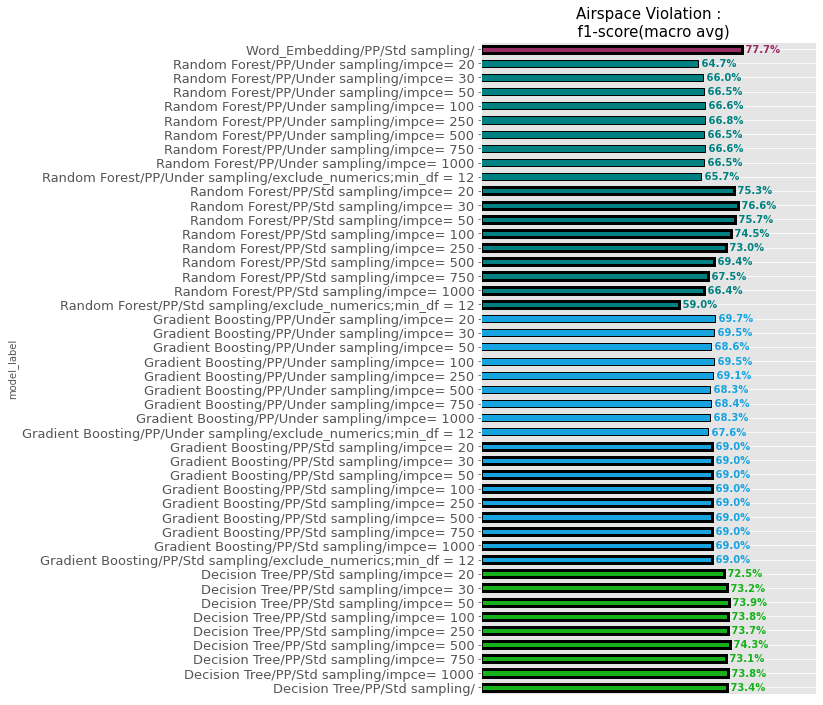

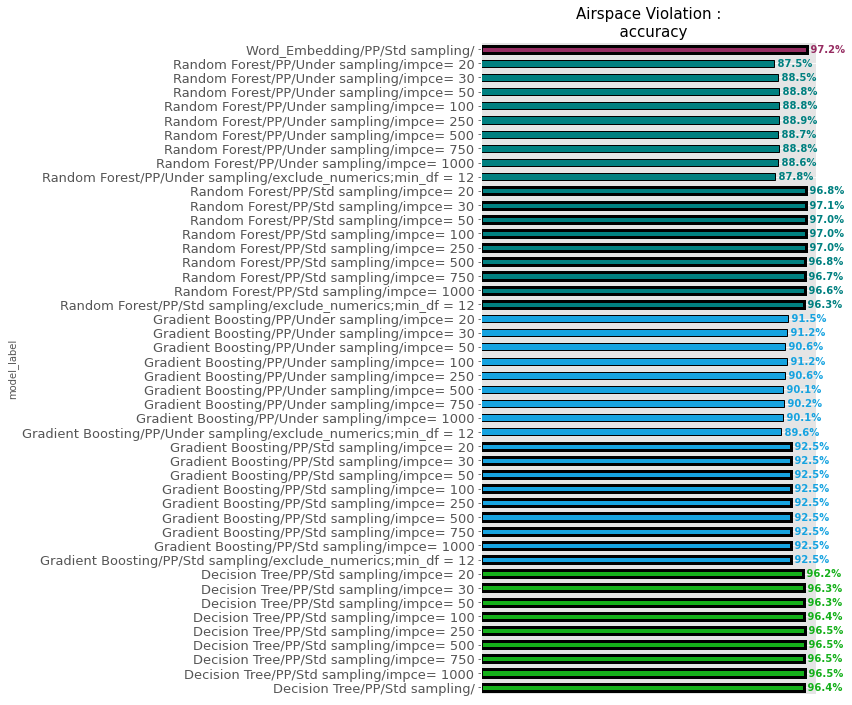

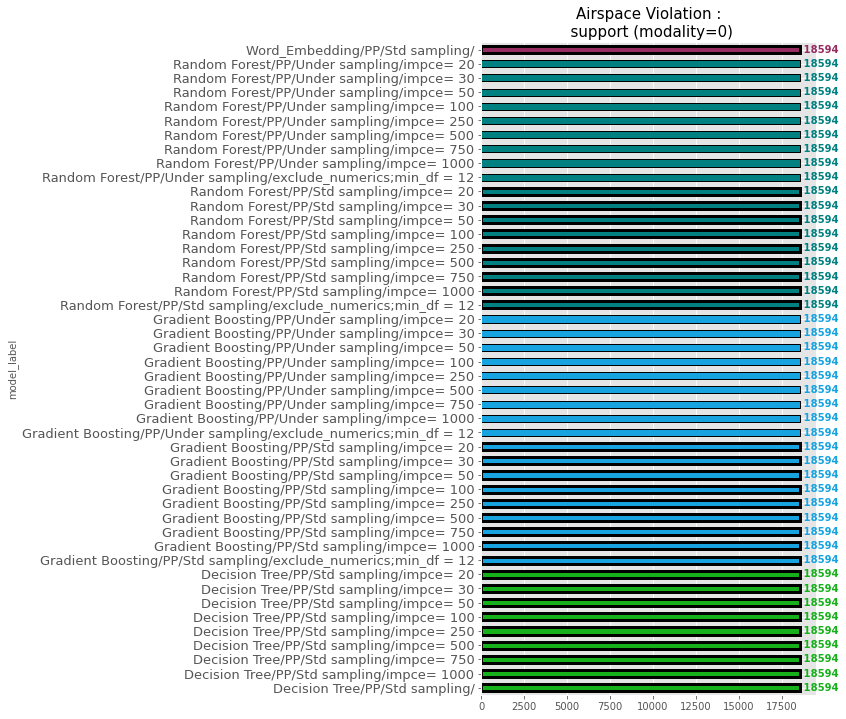

In [15]:
plot_metric(df_model_results=model_results,anomaly_list=['Anomaly_Airspace Violation'],metric="f1-score",modality="macro avg",dict_model_color=dict_model_color)
plot_metric(df_model_results=model_results,anomaly_list=['Anomaly_Airspace Violation'],metric="accuracy",dict_model_color=dict_model_color)
plot_metric(df_model_results=model_results,anomaly_list=['Anomaly_Airspace Violation'],metric="support",modality="0",dict_model_color=dict_model_color)